In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import plot_tree 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, recall_score
from IPython.display import Image
from sklearn import tree

Reading csv file and Preprocessing


In [3]:
df= pd.read_csv('C:/Users/farah/Desktop/merged_output_file.csv')

In [4]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         543 non-null    int64  
 1   malignancy         543 non-null    int64  
 2   Area               543 non-null    float64
 3   Perimeter          543 non-null    float64
 4   Eccentricity       543 non-null    float64
 5   Solidity           543 non-null    float64
 6   Major_Axis_Length  543 non-null    float64
 7   Minor_Axis_Length  543 non-null    float64
 8   Compactness        543 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 38.3 KB


In [5]:
df.head()

,patient_id,malignancy,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
0,1,5,262.0,68.734019,0.715748,0.885135,22.310861,15.580988,18.031929
1,2,5,68.0,45.213203,0.975082,0.715789,22.146639,4.913129,30.062261
2,3,2,38.0,21.485281,0.779856,0.950000,8.947843,5.600983,12.147824
3,4,1,10.0,9.449747,0.766215,0.909091,4.477016,2.876861,8.929773
4,5,3,36.0,19.656854,0.527556,0.972973,7.338877,6.234523,10.733109


In [6]:
df.columns

Index(['patient_id', 'malignancy', 'Area', 'Perimeter', 'Eccentricity',
       'Solidity', 'Major_Axis_Length', 'Minor_Axis_Length', 'Compactness'],
      dtype='object')

In [7]:
df.shape

(543, 9)

In [8]:
df.isna().any()

patient_id           False
malignancy           False
Area                 False
Perimeter            False
Eccentricity         False
Solidity             False
Major_Axis_Length    False
Minor_Axis_Length    False
Compactness          False
dtype: bool

In [9]:
df.describe()

,patient_id,malignancy,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,280.631676,2.668508,55.488029,23.298081,0.602640,0.803255,9.128792,5.842919,11.477634
std,162.793149,1.436434,75.566735,19.568517,0.276754,0.304669,7.430903,4.054656,6.742472
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,139.500000,2.000000,14.000000,11.139087,0.508140,0.846990,5.203549,3.460003,9.142697
50%,282.000000,3.000000,30.000000,19.071068,0.670820,0.919831,7.419140,5.129722,11.313997
75%,421.500000,4.000000,60.500000,29.210155,0.804423,0.958493,11.253774,7.336760,13.675749
max,561.000000,5.000000,504.000000,133.474134,0.994546,1.000000,69.661003,22.195299,65.739278


In [10]:
df.duplicated().sum()

0

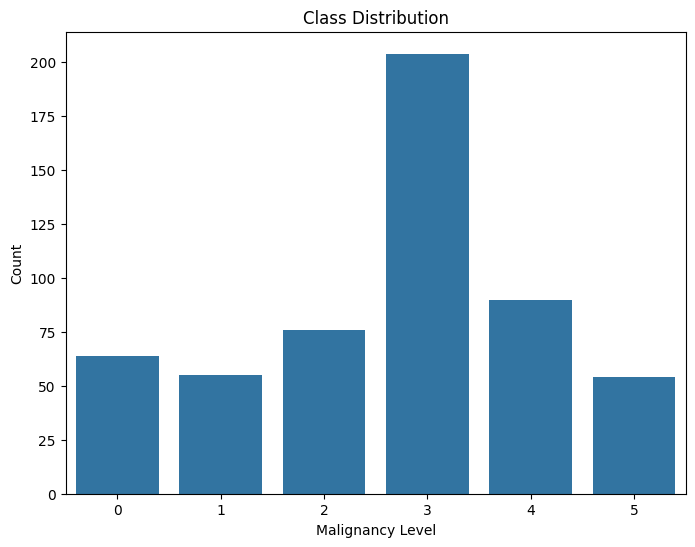

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='malignancy', data=df)
plt.title('Class Distribution')
plt.xlabel('Malignancy Level')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Features Correlating with Malignancy')

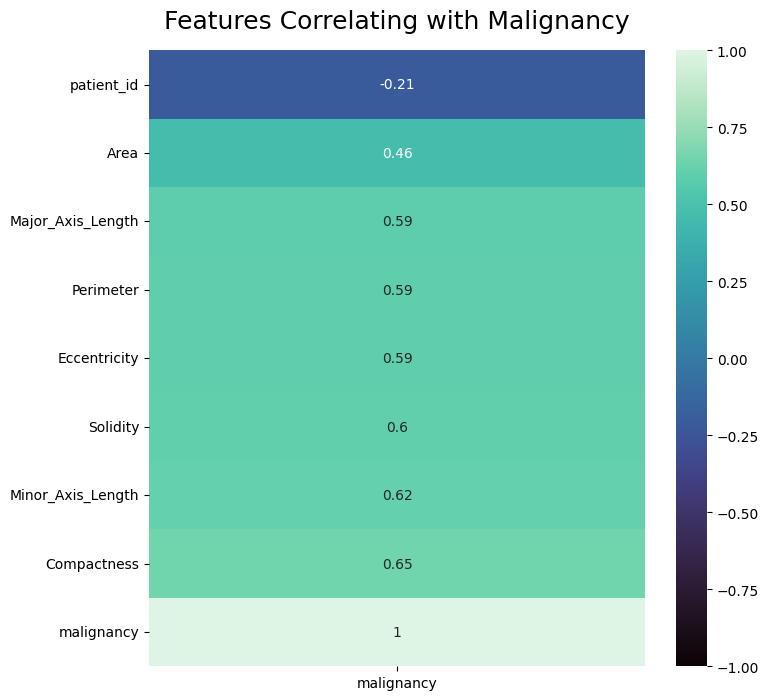

In [13]:
df.corr()[['malignancy']].sort_values(by='malignancy')
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df.corr()[['malignancy']].sort_values(by='malignancy'), vmin=-1, vmax=1, annot=True, cmap='mako')
heatmap.set_title('Features Correlating with Malignancy', fontdict={'fontsize':18}, pad=16)   


<Figure size 640x480 with 0 Axes>

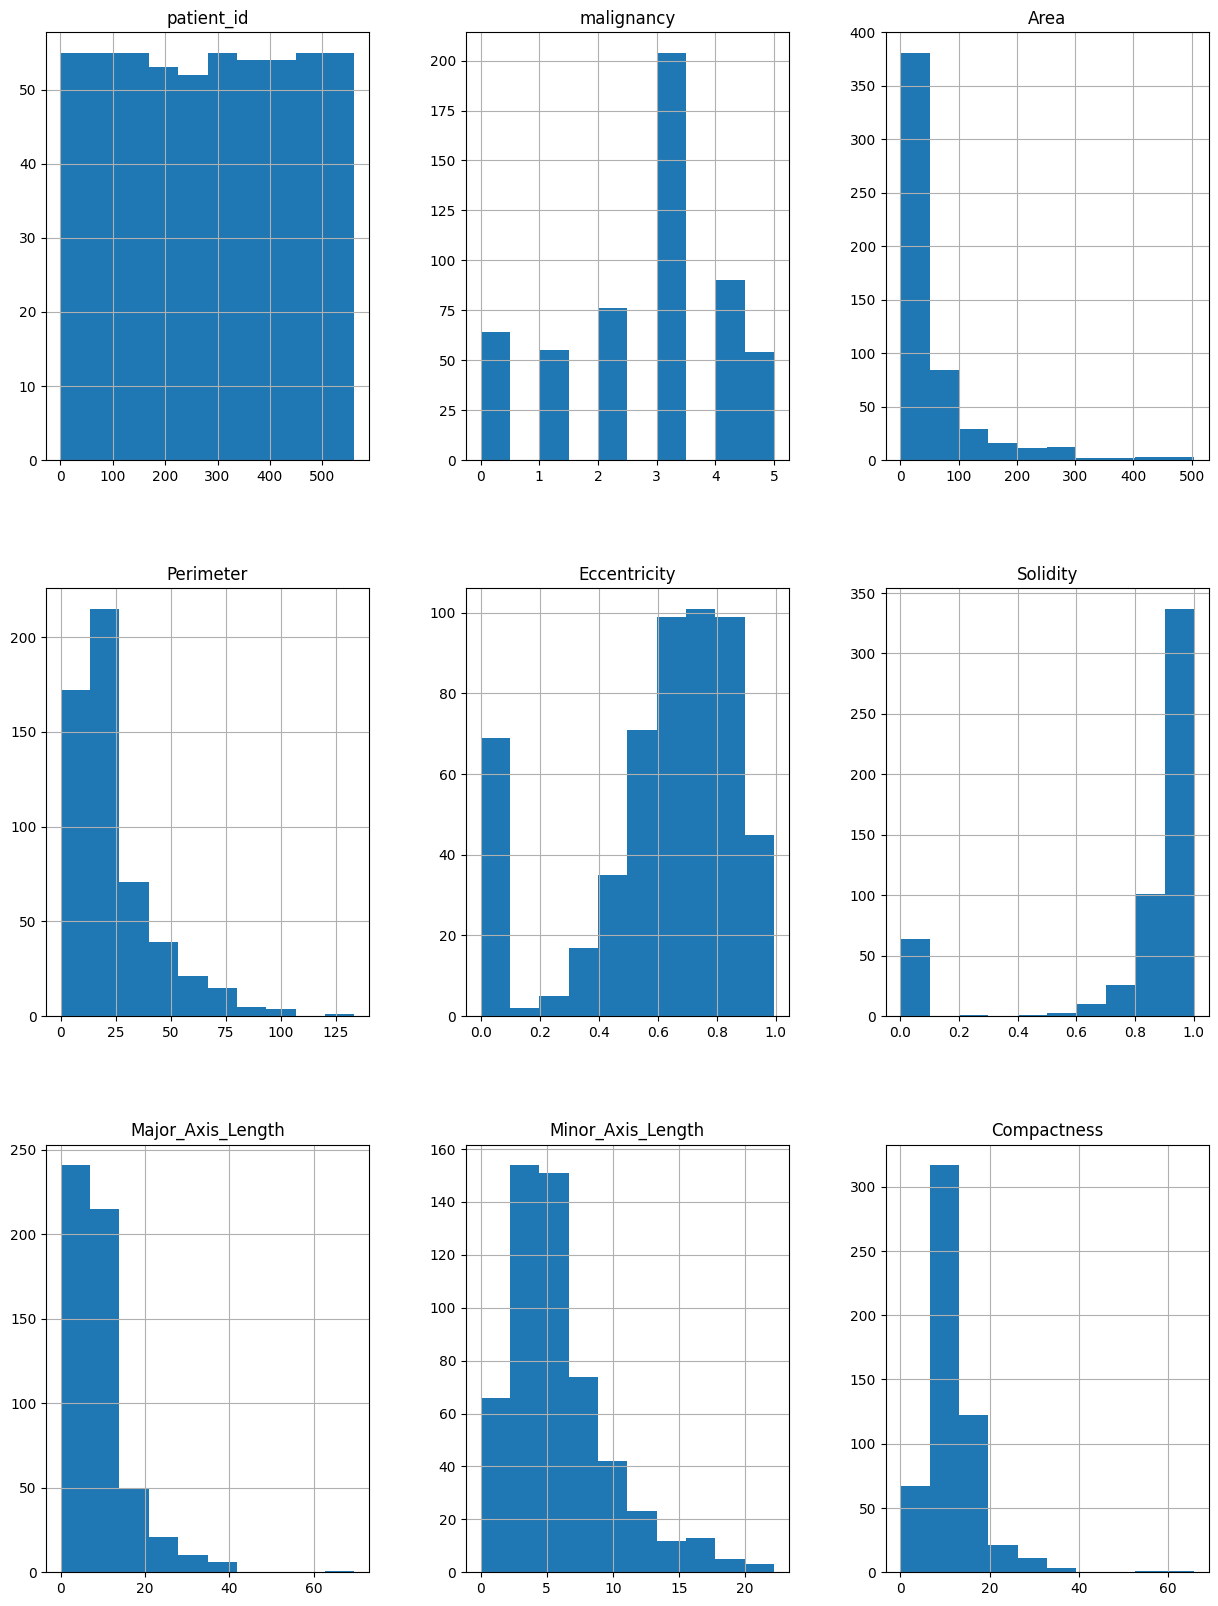

<Figure size 640x480 with 0 Axes>

In [14]:
#histogram of each input variable to get an idea of the distribution
df.hist(figsize=(15,20))
plt.figure()

In [15]:
import numpy as np

# Assuming df is your DataFrame with the 'malignancy' column
class_labels = np.unique(df['malignancy'])
class_samples = [np.sum(df['malignancy'] == label) for label in class_labels]
total_samples = len(df)

# Manually calculate class weights
class_weights = total_samples / (len(class_labels) * np.array(class_samples, dtype=float))  # Use float directly

# Display the computed class labels and weights
for label, weight in zip(class_labels, class_weights):
    print(f"Class {label}: Weight {weight}")


Class 0: Weight 1.4140625
Class 1: Weight 1.6454545454545455
Class 2: Weight 1.1907894736842106
Class 3: Weight 0.44362745098039214
Class 4: Weight 1.0055555555555555
Class 5: Weight 1.6759259259259258


In [16]:
#Splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop('malignancy',axis=1)
y=df['malignancy']
col_names=X.columns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [17]:
X.head()

,patient_id,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
0,1,262.0,68.734019,0.715748,0.885135,22.310861,15.580988,18.031929
1,2,68.0,45.213203,0.975082,0.715789,22.146639,4.913129,30.062261
2,3,38.0,21.485281,0.779856,0.950000,8.947843,5.600983,12.147824
3,4,10.0,9.449747,0.766215,0.909091,4.477016,2.876861,8.929773
4,5,36.0,19.656854,0.527556,0.972973,7.338877,6.234523,10.733109


In [18]:
y.head()

0    5
1    5
2    2
3    1
4    3
Name: malignancy, dtype: int64

In [19]:
#Feature scaling using Standardization
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Area','Perimeter','Eccentricity','Solidity','Major_Axis_Length','Minor_Axis_Length','Compactness']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [20]:
print(X_train_stand.shape)
print(X_test_stand.shape)
print(y_train.shape)
print(y_test.shape)

(434, 8)
(109, 8)
(434,)
(109,)


In [21]:
X_train_stand.head()

,patient_id,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
246,274,0.191855,0.392301,-0.561086,0.422202,0.122971,0.780871,0.320619
417,485,0.258638,0.550459,0.097549,0.188458,0.283699,0.723614,0.575240
529,482,-0.743107,-1.202667,-2.193895,-2.639093,-1.217133,-1.452486,-1.674675
80,86,-0.529402,-0.572177,0.171807,0.447927,-0.533755,-0.483158,-0.310604
270,302,-0.556115,-0.602345,0.419832,0.422202,-0.529384,-0.558577,-0.261352


In [22]:
X_test_stand.head()

,patient_id,Area,Perimeter,Eccentricity,Solidity,Major_Axis_Length,Minor_Axis_Length,Compactness
244,272,-0.262270,-0.105022,0.482662,0.312870,-0.103515,-0.042733,0.162803
35,39,-0.248913,-0.190349,-0.424484,0.554551,-0.247267,0.128132,-0.154012
387,450,0.298708,0.864632,0.895767,-0.106055,0.808961,0.553619,1.333569
456,534,-0.542758,-0.705344,1.313752,0.640866,-0.112111,-0.888937,-0.769387
213,235,-0.409192,-0.323516,0.824056,0.514714,-0.214564,-0.403487,0.022740


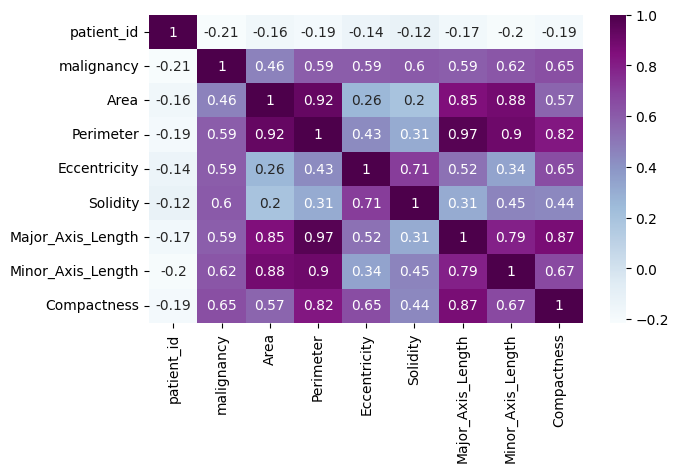

In [23]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='BuPu') #draws  heatmap
plt.show()

<Axes: xlabel='Area', ylabel='Perimeter'>

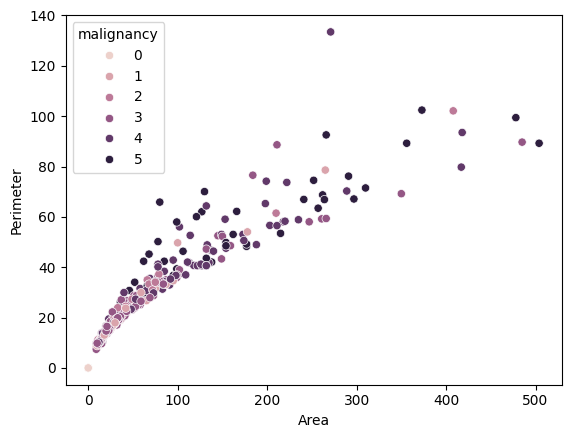

In [24]:
sns.scatterplot(x=df['Area'],y=df['Perimeter'],hue=df['malignancy'])

<Axes: xlabel='Major_Axis_Length', ylabel='Perimeter'>

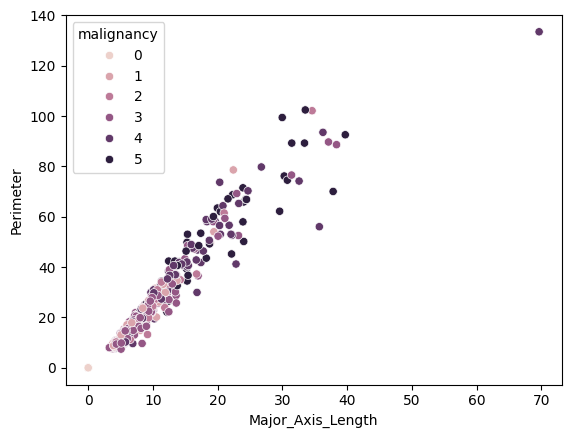

In [25]:
sns.scatterplot(x=df['Major_Axis_Length'],y=df['Perimeter'],hue=df['malignancy'])

<Axes: xlabel='Area', ylabel='Minor_Axis_Length'>

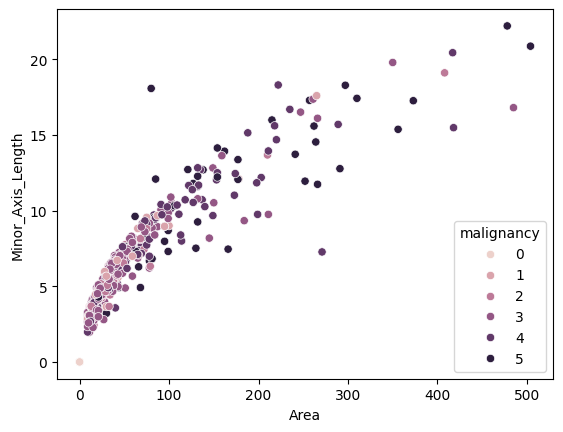

In [26]:
sns.scatterplot(x=df['Area'],y=df['Minor_Axis_Length'],hue=df['malignancy'])

<Axes: xlabel='Minor_Axis_Length', ylabel='Perimeter'>

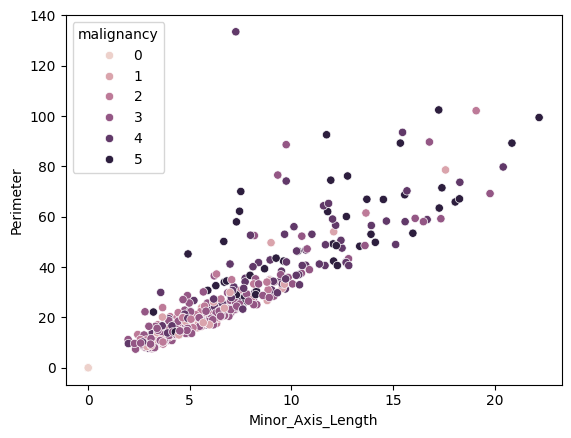

In [27]:
sns.scatterplot(x=df['Minor_Axis_Length'],y=df['Perimeter'],hue=df['malignancy'])

<Axes: xlabel='Major_Axis_Length', ylabel='Area'>

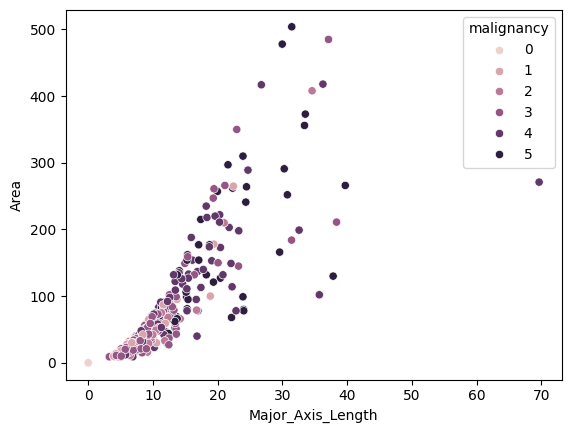

In [28]:
sns.scatterplot(x=df['Major_Axis_Length'],y=df['Area'],hue=df['malignancy'])

Classification Algorithms

In [29]:
import pydotplus
#Decision Tree
dtree_classifier=DecisionTreeClassifier(criterion='entropy',random_state=42,class_weight="balanced")
dtree_classifier.fit(X_train_stand,y_train)
y_pred=dtree_classifier.predict(X_test_stand)
tree_accuracy=accuracy_score(y_test,y_pred)
tree_precision=precision_score(y_test,y_pred,average="weighted")
tree_recall=recall_score(y_test,y_pred,average="weighted")
print("Decision Tree Accuracy before Optimization: ", tree_accuracy)

Decision Tree Accuracy before Optimization:  0.3486238532110092


In [30]:
#Decision tree hyperparameter tuning
import numpy as np
# Define the parameter distributions
params_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.random.randint(4, 40, size=10),  # Example: Generates 10 random integers between 4 and 40
    'max_leaf_nodes': np.random.randint(1000, 20000, size=10),
    'min_samples_leaf': np.random.randint(20, 100, size=10),
    'min_samples_split': np.random.randint(40, 200, size=10)
}

# Create and fit a decision tree classifier
clf_tuned = DecisionTreeClassifier(random_state=42,class_weight="balanced")
random_search = RandomizedSearchCV(clf_tuned, params_dist, cv=7,random_state=42)
random_search.fit(X_train_stand, y_train)
best_estimator = random_search.best_estimator_

# Access the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)
best_estimator

Best hyperparameters: {'min_samples_split': 102, 'min_samples_leaf': 26, 'max_leaf_nodes': 14064, 'max_depth': 9, 'criterion': 'entropy'}


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_leaf_nodes=14064, min_samples_leaf=26,
                       min_samples_split=102, random_state=42)

In [33]:
#Decision Tree after optimization
dtree_classifier_optimized=DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_leaf_nodes=14064, min_samples_leaf=26,
                       min_samples_split=102, random_state=42)
dtree_classifier_optimized.fit(X_train_stand,y_train)
y_pred_tree_opt=dtree_classifier_optimized.predict(X_test_stand)
tree_accuracy_opt=accuracy_score(y_test,y_pred_tree_opt)
print("Decision Tree Accuracy after Optimization:", tree_accuracy_opt)


Decision Tree Accuracy after Optimization: 0.3669724770642202


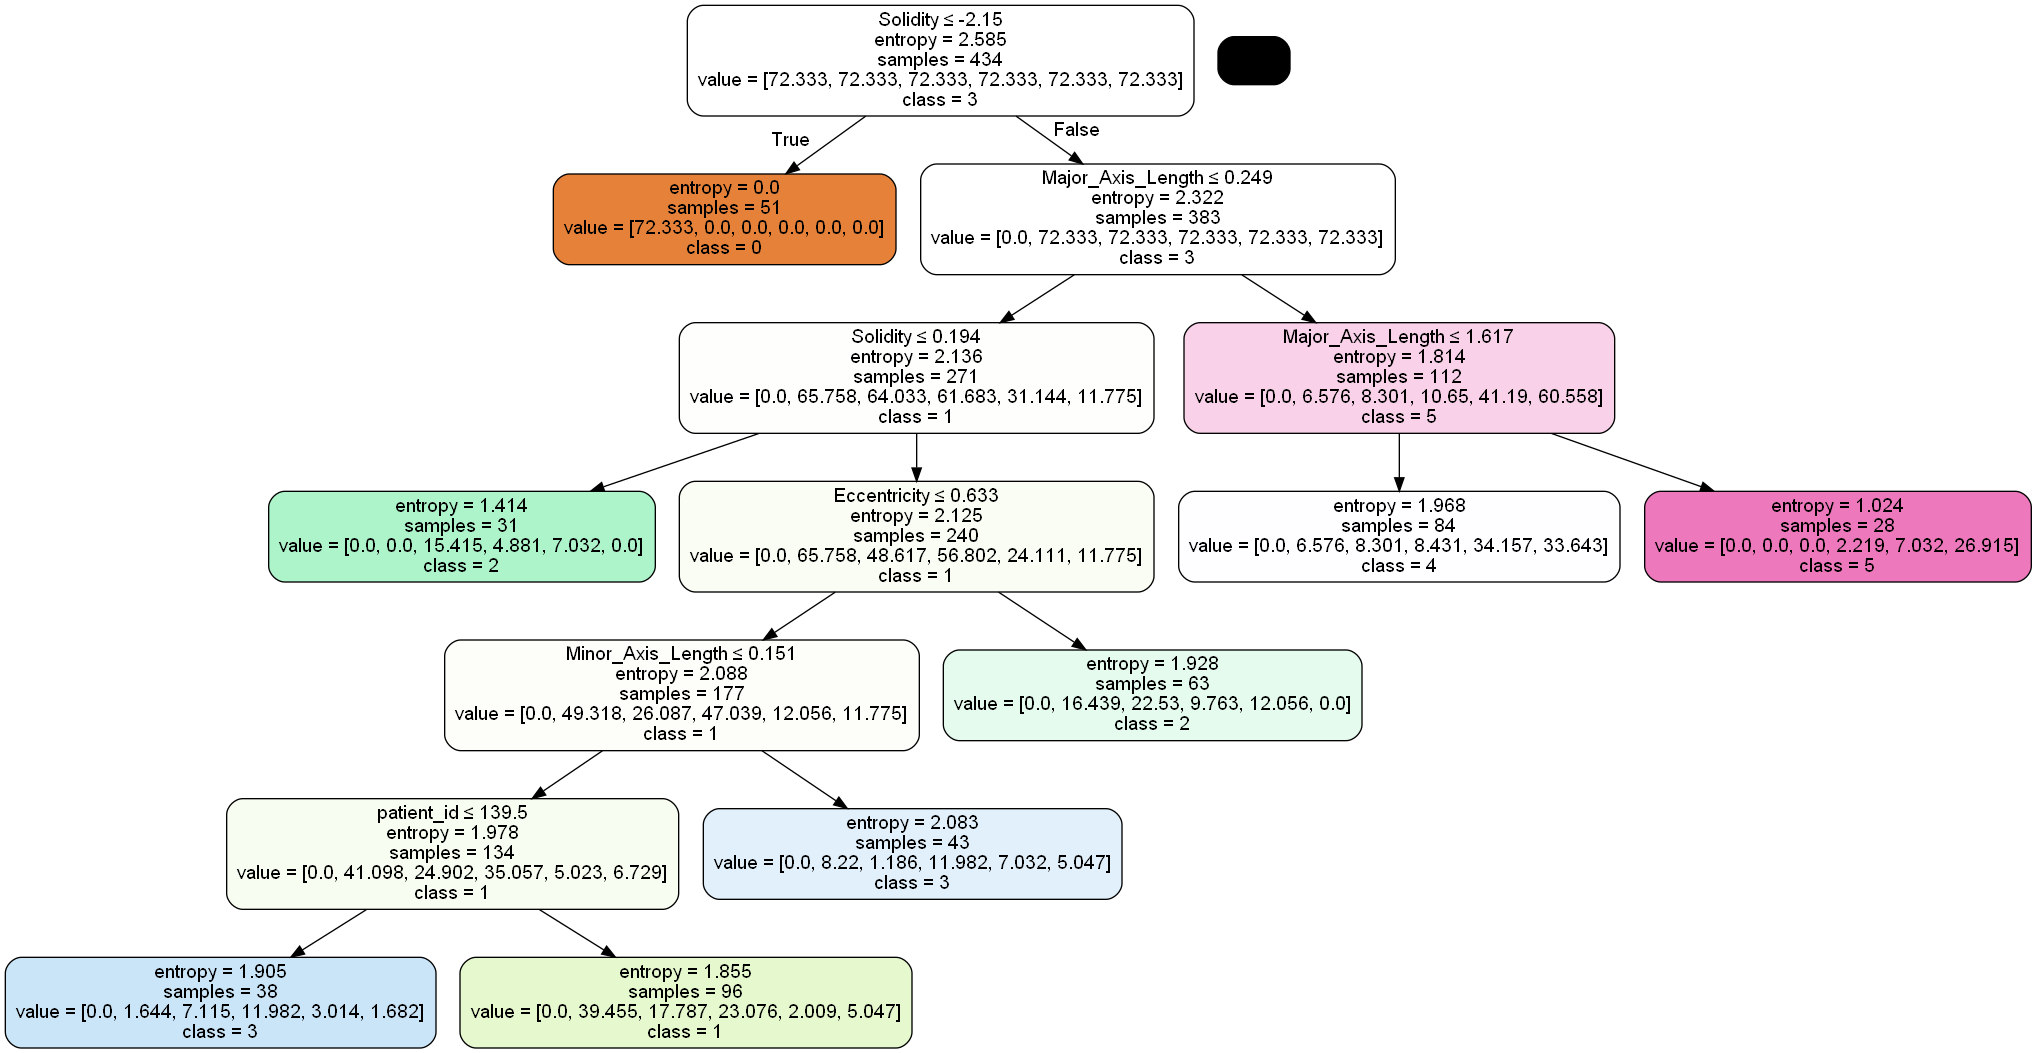

In [34]:
#Visualizing Decision Tree
Names=list(X.columns.values)
# Convert class names to strings
class_names = [str(class_label) for class_label in np.unique(y)]
dot_data = tree.export_graphviz(dtree_classifier_optimized, out_file=None, filled=True, rounded=True,special_characters=True,feature_names=Names,class_names=class_names)  
                                
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [35]:
#Decision Tree Metrics
from sklearn.metrics import accuracy_score
matrix = confusion_matrix(y_test, y_pred_tree_opt)
print(matrix)
report = classification_report(y_test, y_pred_tree_opt)
print(report)

[[13  0  0  0  0  0]
 [ 0  4  2  3  1  1]
 [ 0  7  6  1  0  1]
 [ 0 19  9  8  5  0]
 [ 0  3  2  2  7  4]
 [ 0  0  1  1  7  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.12      0.36      0.18        11
           2       0.30      0.40      0.34        15
           3       0.53      0.20      0.29        41
           4       0.35      0.39      0.37        18
           5       0.25      0.18      0.21        11

    accuracy                           0.37       109
   macro avg       0.43      0.42      0.40       109
weighted avg       0.46      0.37      0.37       109



In [36]:
dtree_classifier_optimized.classes_
classes=str(dtree_classifier_optimized.classes_)
classes

'[0 1 2 3 4 5]'

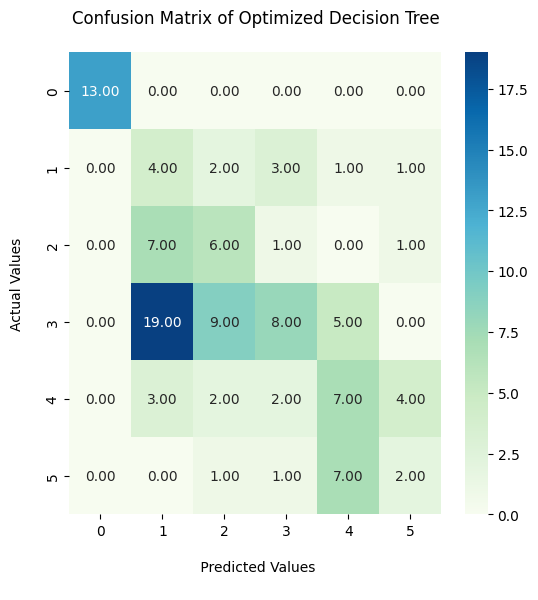

In [37]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_tree_opt), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix of Optimized Decision Tree\n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()


In [38]:
#K-fold cross-validation for Decision Tree
dtree_kfold=DecisionTreeClassifier()
accuracies_dtree_kfold = cross_val_score(dtree_kfold, X_train_stand, y_train, cv = 10)
print(accuracies_dtree_kfold)
res_dt_k=accuracies_dtree_kfold.mean()*100
print("Decision Tree K-Fold Validation Mean Accuracy: {:.2f} %".format(res_dt_k))

[0.38636364 0.29545455 0.43181818 0.5        0.39534884 0.37209302
 0.51162791 0.53488372 0.69767442 0.27906977]
Decision Tree K-Fold Validation Mean Accuracy: 44.04 %


In [39]:
#Grid Search for hyperparameter tuning of Random Forest
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 170, 200]
    
}

random_forest = RandomForestRegressor()
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)


grid_search.fit(X_train_stand, y_train)
print(grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'bootstrap': True, 'max_depth': 3, 'n_estimators': 90}


In [41]:
#Random Forest Classifier
forest = RandomForestClassifier(criterion='gini',bootstrap=True,
                                 n_estimators=90,
                                 max_depth=3,
                                 random_state=42,
                                 n_jobs=2,class_weight="balanced")

forest.fit(X_train_stand, y_train)

y_pred_forest = forest.predict(X_test_stand)
random_forest_accuracy =accuracy_score(y_test,y_pred_forest)
random_forest_precision=precision_score(y_test,y_pred_forest,average="weighted")
random_forest_recall = recall_score(y_test,y_pred_forest,average="weighted")
print('Random Forest Accuracy: %.2f' % round(accuracy_score(y_test, y_pred_forest),2))

Random Forest Accuracy: 0.33


In [42]:
#Random Forest Metrics
matrix = confusion_matrix(y_test, y_pred_forest)
print(matrix)
report = classification_report(y_test, y_pred_forest)
print(report)

[[13  0  0  0  0  0]
 [ 0  5  2  2  1  1]
 [ 0  7  6  1  0  1]
 [ 0 22  9  3  6  1]
 [ 0  1  4  1  4  8]
 [ 0  0  1  1  4  5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.14      0.45      0.22        11
           2       0.27      0.40      0.32        15
           3       0.38      0.07      0.12        41
           4       0.27      0.22      0.24        18
           5       0.31      0.45      0.37        11

    accuracy                           0.33       109
   macro avg       0.39      0.43      0.38       109
weighted avg       0.39      0.33      0.31       109



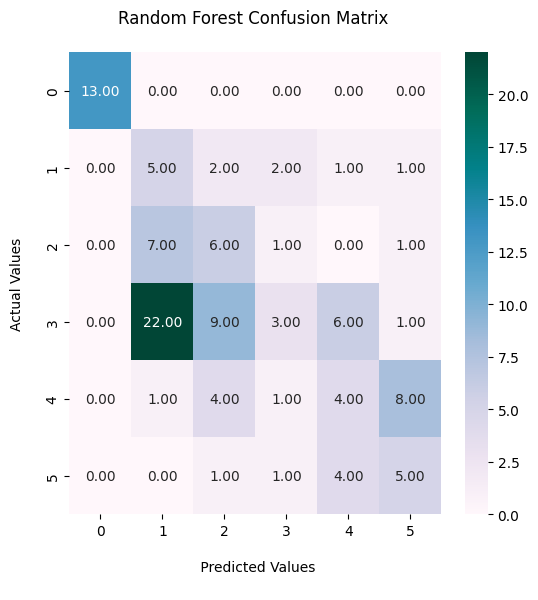

In [43]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_forest), annot=True, fmt=".2f",cmap="PuBuGn")
fx.set_title('Random Forest Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

In [44]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_stand, y_train)
y_pred_naive = naive_bayes_model.predict(X_test_stand)
print('Naive Bayes Accuracy: %.2f' % round(accuracy_score(y_test, y_pred_naive),2))
matrix = confusion_matrix(y_test, y_pred_naive)
print(matrix)
report = classification_report(y_test, y_pred_naive)
print(report)
naive_bayes_accuracy=accuracy_score(y_test,y_pred_naive)
naive_bayes_precision=precision_score(y_test,y_pred_naive,average="weighted")
naive_bayes_recall=recall_score(y_test,y_pred_naive,average="weighted")


Naive Bayes Accuracy: 0.36
[[13  0  0  0  0  0]
 [ 0  3  6  1  0  1]
 [ 0  2 11  1  0  1]
 [ 0 13 22  5  0  1]
 [ 0  1  5  4  3  5]
 [ 0  1  1  1  4  4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.15      0.27      0.19        11
           2       0.24      0.73      0.37        15
           3       0.42      0.12      0.19        41
           4       0.43      0.17      0.24        18
           5       0.33      0.36      0.35        11

    accuracy                           0.36       109
   macro avg       0.43      0.44      0.39       109
weighted avg       0.43      0.36      0.33       109



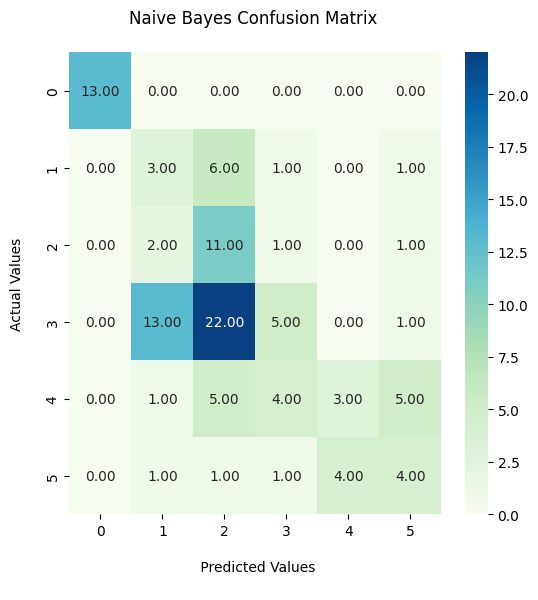

In [45]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_naive), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Naive Bayes Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

In [46]:
#Grid Search for hyperparameter tuning of Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train_stand, y_train)

print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=8.111308307896872e-05)


In [47]:
naive_bayes_model_optimized = GaussianNB(var_smoothing=8.111308307896872e-05)
naive_bayes_model_optimized.fit(X_train_stand, y_train)
y_pred_naive_optimized = naive_bayes_model_optimized.predict(X_test_stand)
print('Naive Bayes Accuracy after optimization: %.2f' % round(accuracy_score(y_test, y_pred_naive_optimized),2))

Naive Bayes Accuracy after optimization: 0.52


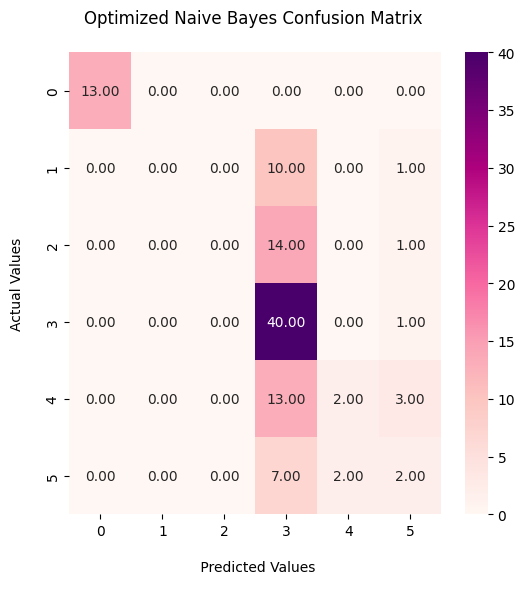

In [48]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_naive_optimized), annot=True, fmt=".2f",cmap="RdPu")
fx.set_title('Optimized Naive Bayes Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

In [49]:
#Adaboost Classifier
ada_boost = AdaBoostClassifier(n_estimators=42,learning_rate=1,random_state=42)
ada_boost.fit(X_train_stand, y_train)
y_out_ada = ada_boost.predict(X_test_stand)
print("AdaBoost Accuracy:",round(metrics.accuracy_score(y_test, y_out_ada),2))
matrix = confusion_matrix(y_test, y_out_ada)
print(matrix)
report = classification_report(y_test, y_out_ada)
print(report)
adaboost_accuracy=accuracy_score(y_test,y_out_ada)
adaboost_precision=precision_score(y_test,y_out_ada,average="weighted")
adaboost_recall=recall_score(y_test,y_out_ada,average="weighted")


AdaBoost Accuracy: 0.5
[[13  0  0  0  0  0]
 [ 0  0  0  8  3  0]
 [ 0  0  0 11  4  0]
 [ 0  0  0 31 10  0]
 [ 0  0  0  7 11  0]
 [ 0  0  0  2  9  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        15
           3       0.53      0.76      0.62        41
           4       0.30      0.61      0.40        18
           5       0.00      0.00      0.00        11

    accuracy                           0.50       109
   macro avg       0.30      0.39      0.34       109
weighted avg       0.37      0.50      0.42       109



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarn

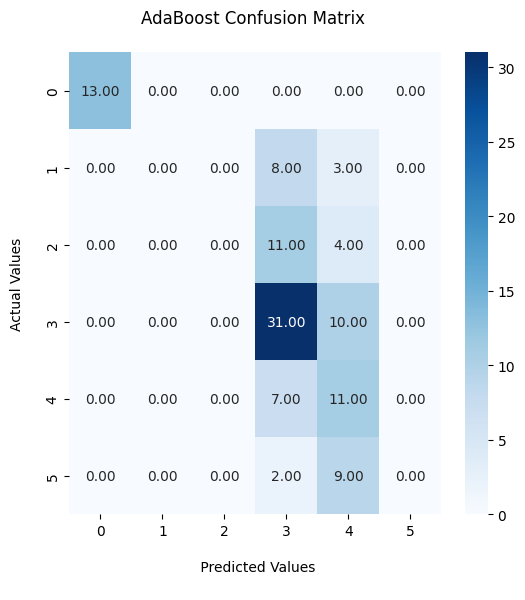

In [50]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,y_out_ada), annot=True, fmt=".2f",cmap="Blues")
fx.set_title('AdaBoost Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

In [51]:
#XGBoost Classifier
import xgboost as xgb
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_stand, y_train)
y_out_xgb = xgb_classifier.predict(X_test_stand)
print("XGBoost Accuracy:",round(metrics.accuracy_score(y_test, y_out_xgb),2))
matrix = confusion_matrix(y_test, y_out_xgb)
print(matrix)
report = classification_report(y_test, y_out_xgb)
print(report)
xgboost_accuracy=accuracy_score(y_test,y_out_xgb)
xgboost_precision=precision_score(y_test,y_out_xgb,average="weighted")
xgboost_recall=recall_score(y_test,y_out_xgb,average="weighted")


XGBoost Accuracy: 0.46
[[13  0  0  0  0  0]
 [ 0  0  3  6  2  0]
 [ 0  2  3  8  1  1]
 [ 0  6  5 25  5  0]
 [ 0  1  2  2  7  6]
 [ 0  0  1  3  5  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.00      0.00      0.00        11
           2       0.21      0.20      0.21        15
           3       0.57      0.61      0.59        41
           4       0.35      0.39      0.37        18
           5       0.22      0.18      0.20        11

    accuracy                           0.46       109
   macro avg       0.39      0.40      0.39       109
weighted avg       0.44      0.46      0.45       109



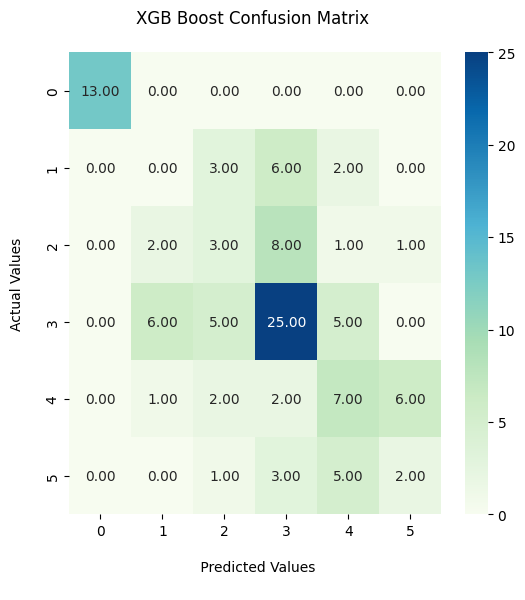

In [52]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,y_out_xgb), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('XGB Boost Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

In [53]:
#SVM Classifier with different kernel functions to compare performance
from sklearn import svm 
linear_svm = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo',random_state=42).fit(X_train_stand, y_train)
rbf_svm = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo',random_state=42).fit(X_train_stand, y_train)
poly_svm = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo',random_state=42).fit(X_train_stand, y_train)
sig_svm = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo',random_state=42).fit(X_train_stand, y_train)

In [54]:
linear_pred = linear_svm.predict(X_test_stand)
poly_pred = poly_svm.predict(X_test_stand)
rbf_pred = rbf_svm.predict(X_test_stand)
sig_pred = sig_svm.predict(X_test_stand)


In [55]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear_svm.score(X_test_stand, y_test)
accuracy_poly = poly_svm.score(X_test_stand, y_test)
accuracy_rbf = rbf_svm.score(X_test_stand, y_test)
accuracy_sig = sig_svm.score(X_test_stand, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)
lin_precision=precision_score(y_test,linear_pred,average="weighted")
lin_recall=recall_score(y_test,linear_pred,average="weighted")


Accuracy Linear Kernel: 0.5137614678899083
Accuracy Polynomial Kernel: 0.3761467889908257
Accuracy Radial Basis Kernel: 0.3853211009174312
Accuracy Sigmoid Kernel: 0.3119266055045872


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


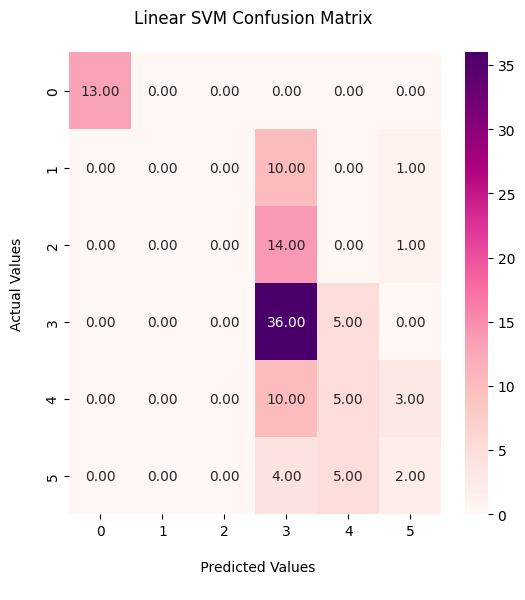

In [56]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,linear_pred), annot=True, fmt=".2f",cmap="RdPu")
fx.set_title('Linear SVM Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

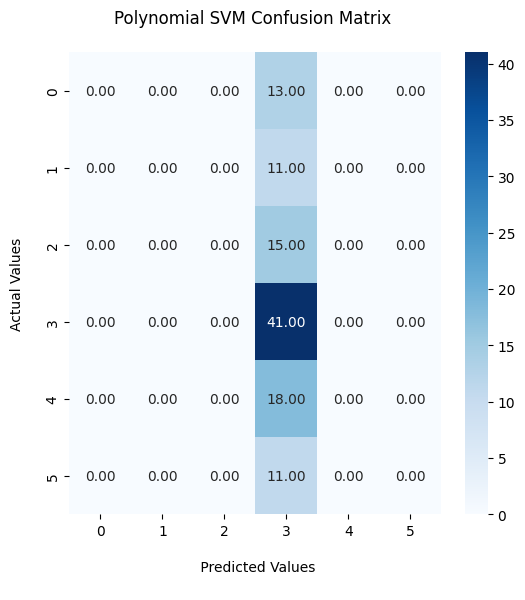

In [57]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,poly_pred), annot=True, fmt=".2f",cmap="Blues")
fx.set_title('Polynomial SVM Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

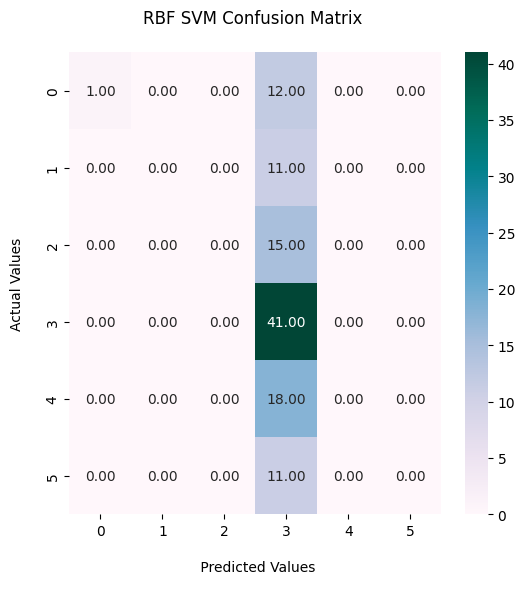

In [58]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,rbf_pred), annot=True, fmt=".2f",cmap="PuBuGn")
fx.set_title('RBF SVM Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

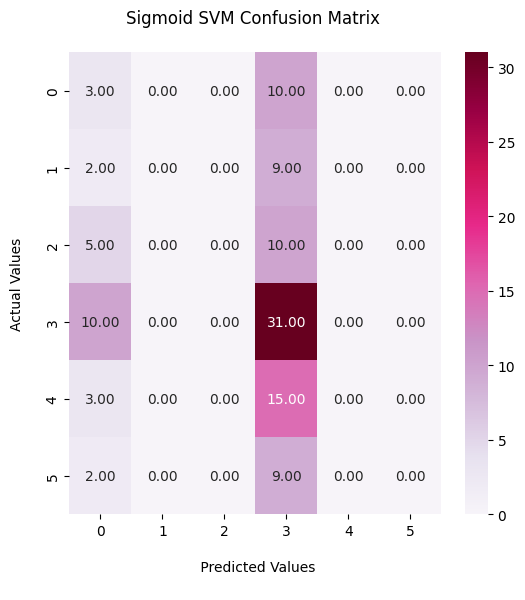

In [59]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,sig_pred), annot=True, fmt=".2f",cmap="PuRd")
fx.set_title('Sigmoid SVM Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

In [60]:
#KNN Classfier
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_stand, y_train)
    train_score[neighbor]=knn.score(X_train_stand, y_train)
    test_score[neighbor]=knn.score(X_test_stand, y_test)

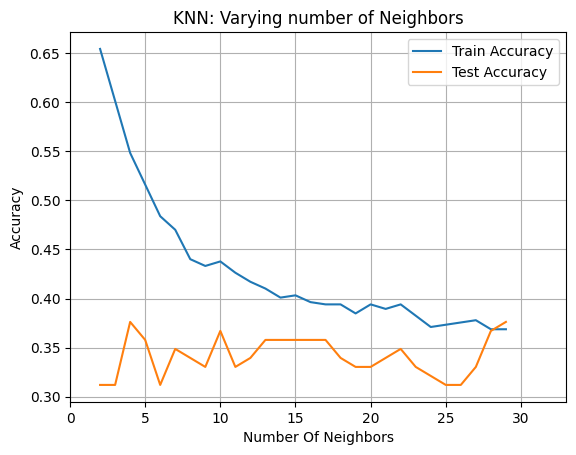

In [61]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.grid()
plt.show()

In [62]:
for key, value in test_score.items():
    if value==max(test_score.values()):
        print(key)

4
29


In [63]:
from sklearn.model_selection import KFold
knn_kfold=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=knn_kfold, verbose=1)
knn_cv.fit(X_train_stand, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 27}


In [64]:
knn_tuned=KNeighborsClassifier(n_neighbors=27)
knn_tuned.fit(X_train_stand, y_train)
y_pred_knn=knn_tuned.predict(X_test_stand)
knn_accuracy_score=accuracy_score(y_test, y_pred_knn)*100
print("Accuracy for testing dataset after tuning : {:.2f}%".format(knn_accuracy_score))
knn_accuracy_score=accuracy_score(y_test, y_pred_knn)
knn_precision=precision_score(y_test,y_pred_knn,average="weighted")
knn_recall=recall_score(y_test,y_pred_knn,average="weighted")

Accuracy for testing dataset after tuning : 33.03%


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


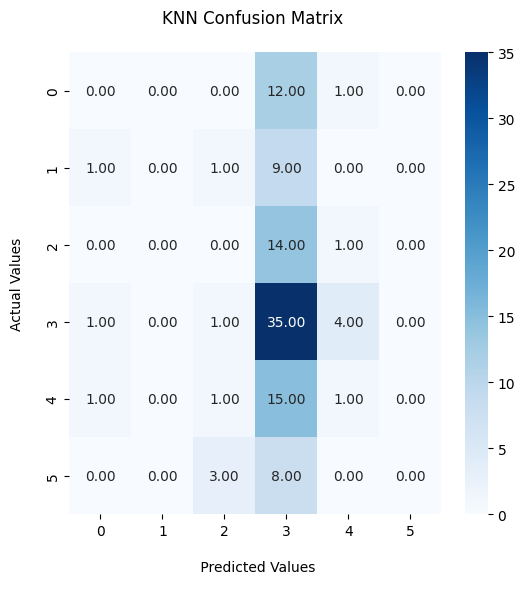

In [65]:
#Visualzing the confusion matrix
plt.figure(figsize=(6,6))
fx=sns.heatmap(confusion_matrix(y_test,y_pred_knn), annot=True, fmt=".2f",cmap="Blues")
fx.set_title('KNN Confusion Matrix \n')
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n')
fx.xaxis.set_ticklabels(['0','1','2','3','4','5'])
fx.yaxis.set_ticklabels(['0','1','2','3','4','5'])
plt.show()

In [66]:
#Accuracy Table
print("Decision Tree Acuracy score: ",tree_accuracy)
print("Random Forest Acuracy score: ",random_forest_accuracy)
print("Naive Bayes Acuracy score: ",naive_bayes_accuracy)
print("AdaBoost Acuracy score: ",adaboost_accuracy)
print("XGBoost Acuracy score: ",xgboost_accuracy)
print("Linear SVM Acuracy score: ",accuracy_lin)
print("KNN Acuracy score: ",knn_accuracy_score)

tree_error=1-tree_accuracy
random_forest_error=1-random_forest_accuracy
naive_bayes_error=1-naive_bayes_accuracy
adaboost_error=1-adaboost_accuracy
xgboost_error=1-xgboost_accuracy
lin_error=1-accuracy_lin
knn_error=1-knn_accuracy_score




Decision Tree Acuracy score:  0.3486238532110092
Random Forest Acuracy score:  0.3302752293577982
Naive Bayes Acuracy score:  0.3577981651376147
AdaBoost Acuracy score:  0.5045871559633027
XGBoost Acuracy score:  0.45871559633027525
Linear SVM Acuracy score:  0.5137614678899083
KNN Acuracy score:  0.3302752293577982


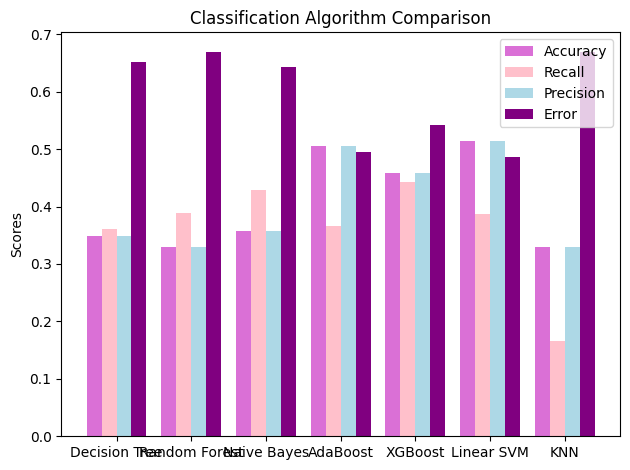

In [72]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ["Decision Tree", "Random Forest", "Naive Bayes", "AdaBoost", "XGBoost", "Linear SVM", "KNN"]
accuracy = [tree_accuracy,random_forest_accuracy,naive_bayes_accuracy,adaboost_accuracy,xgboost_accuracy,accuracy_lin,knn_accuracy_score] 
recall = [tree_recall,random_forest_recall,naive_bayes_recall,adaboost_recall,xgboost_recall,lin_recall,knn_recall]
precision = [tree_precision,random_forest_precision,naive_bayes_precision,adaboost_precision,xgboost_precision,lin_precision,knn_precision]
error = [tree_error,random_forest_error,naive_bayes_error,adaboost_error,xgboost_error,lin_error,knn_error]

x = np.arange(len(algorithms))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*1.5, accuracy, width, label='Accuracy',color=['orchid'])
rects2 = ax.bar(x - width/2, precision, width, label='Recall',color=['pink'])
rects3 = ax.bar(x + width/2, recall, width, label='Precision',color=['lightblue']) 
rects4 = ax.bar(x + width*1.5, error, width, label='Error',color=['purple'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Algorithm Comparison')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()
fig.tight_layout()
plt.show()